In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('00690.csv')
data.set_index(pd.to_datetime(data['Date'],format='%Y/%m/%d'),inplace=True)
data.drop('Date',axis=1,inplace=True)
data.head()

,Price
Date,
2017-03-31,19.91
2017-04-05,19.95
2017-04-06,19.93
2017-04-07,19.84
2017-04-10,19.80


# 乖離率 (BIAS)
## $$Bias=\frac{P-MA}{MA}$$

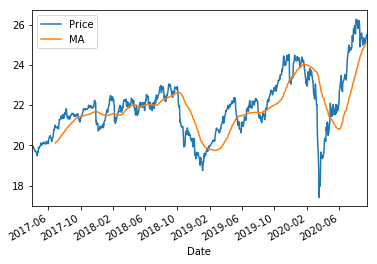

In [3]:
df=data.copy()
df['MA']=df['Price'].rolling(60).mean()
df.plot()

In [4]:
MA=60
Threshold=-0.15
hold_period=40

In [5]:
df['Bias']=df['Price']/df['MA']-1
df['temp']=df['Price'].pct_change(hold_period)
df['return']=list(df['temp'].dropna())+[None]*(len(df)-len(df['temp'].dropna()))
df.dropna(inplace=True)

C:\Users\tinah\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '2.6.2' or newer of 'numexpr' (version '2.6.1' currently installed).
  warnings.warn(msg, UserWarning)


In [6]:
result=df[(df['Bias']<Threshold)]
result

,Price,MA,Bias,temp,return
Date,,,,,
2020-03-16,19.46,23.466500,-0.170733,-0.185433,0.106372
2020-03-17,18.95,23.391167,-0.189865,-0.212386,0.139314
2020-03-18,18.45,23.301167,-0.208194,-0.234757,0.166396
2020-03-19,17.41,23.189333,-0.249224,-0.283834,0.255026
2020-03-20,18.30,23.091833,-0.207512,-0.250000,0.196721
2020-03-23,17.98,22.983667,-0.217705,-0.257025,0.225250
2020-03-24,18.79,22.888667,-0.179070,-0.222268,0.149015


In [7]:
print('出現次數: ', len(result))
print('平均報酬率: ',result['return'].mean()*100)
print('勝率: ', len(result[result['return']>0])/len(result))
print('最大損失: ',result['return'].min())

出現次數:  7
平均報酬率:  17.687065198060576
勝率:  1.0
最大損失:  0.106372045220966
